In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import squareform,pdist

In [8]:
a = [0.39,0.73,0.91,0.28,0.06]
b = [0.17,0.78,0.04,0.01,0.73]
point = ['p1','p2','p3','p4','p5']
data = pd.DataFrame({'Point':point,'a':np.round(a,2),'b':np.round(b,2)})

In [11]:
data = data.set_index('Point')
data

,a,b
Point,,
p1,0.39,0.17
p2,0.73,0.78
p3,0.91,0.04
p4,0.28,0.01
p5,0.06,0.73


Text(0.5, 1.0, 'Scatter Plot X and Y')

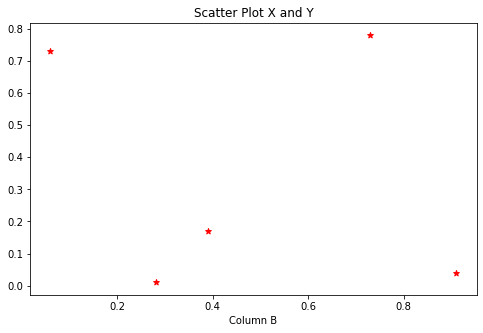

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(data['a'],data['b'],c='r',marker='*')
plt.xlabel('Column A')
plt.xlabel('Column B')
plt.title("Scatter Plot X and Y")

In [14]:
dist = pd.DataFrame(squareform(pdist(data[['a','b']]),'eucledian'),columns=data.index.values,index = data.index.values)
dist

,p1,p2,p3,p4,p5
p1,0.000000,0.698355,0.536004,0.194165,0.650000
p2,0.698355,0.000000,0.761577,0.891852,0.671863
p3,0.536004,0.761577,0.000000,0.630714,1.094806
p4,0.194165,0.891852,0.630714,0.000000,0.752861
p5,0.650000,0.671863,1.094806,0.752861,0.000000


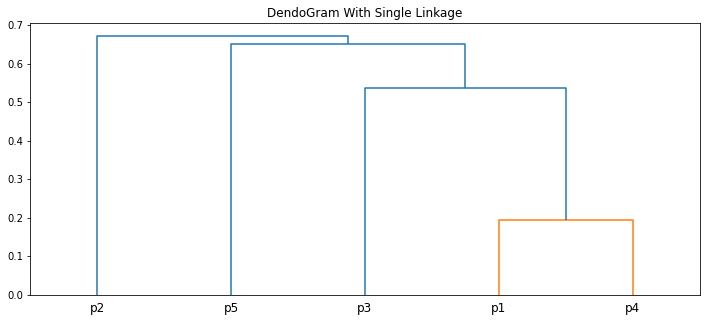

In [16]:
plt.figure(figsize=(12,5))
plt.title("DendoGram With Single Linkage")
dend = shc.dendrogram(shc.linkage(data[['a','b']],method='single'),labels=data.index)

In [19]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='single')
print(cluster.fit_predict(data))

[0 1 0 0 0]
